# 20200605 - Analisando resultados obtidos da pesquisa realizada

## Importando pacotes necessários para execução de código e análise

In [1]:
# Pacotes da linguagem Python que auxiliam no gerenciamento de tabelas de dados (dataframes)
import pandas as pd
import numpy as np

# Pacote da linguagem Python que possiblita execução de regressões logísticas, entre outros modelos
from statsmodels.formula.api import logit

# Pacote da linagugem Python que constroi visualizações de modo fácil e intuitivo
import seaborn as sns

sns.set(style = "whitegrid")
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth": 2.5})

## Importando resultados obtidos em `.csv` do Google Forms

In [2]:
respostas = pd.read_csv('Responses.csv').iloc[:, 1:10]

In [3]:
respostas.head(10)

,Qual das opções abaixo é mais atraente?,Qual das opções abaixo é mais atraente?.1,Qual das opções abaixo é mais atraente?.2,Qual das opções abaixo é mais atraente?.3,Qual das opções abaixo é mais atraente?.4,Qual das opções abaixo é mais atraente?.5,Qual das opções abaixo é mais atraente?.6,Qual das opções abaixo é mais atraente?.7,Qual das opções abaixo é mais atraente?.8
0,Opção 2,Opção 4,Opção 5,Opção 8,Opção 9,Opção 12,Opção 14,Opção 16,Opção 18
1,Opção 2,Opção 4,Opção 5,Opção 7,Opção 10,Opção 12,Opção 13,Opção 15,Opção 18
2,Opção 2,Opção 4,Opção 6,Opção 7,Opção 9,Opção 12,Opção 13,Opção 15,Opção 18
3,Opção 2,Opção 4,Opção 6,Opção 8,Opção 9,Opção 11,Opção 13,Opção 16,Opção 18
4,Opção 2,Opção 4,Opção 5,Opção 8,Opção 10,Opção 12,Opção 13,Opção 15,Opção 18
5,Opção 2,Opção 4,Opção 5,Opção 7,Opção 10,Opção 12,Opção 13,Opção 15,Opção 17
6,Opção 2,Opção 4,Opção 5,Opção 8,Opção 10,Opção 12,Opção 13,Opção 16,Opção 18
7,Opção 2,Opção 4,Opção 5,Opção 8,Opção 10,Opção 12,Opção 13,Opção 15,Opção 18
8,Opção 2,Opção 4,Opção 5,Opção 8,Opção 10,Opção 12,Opção 13,Opção 15,Opção 18
9,Opção 2,Opção 4,Opção 5,Opção 8,Opção 10,Opção 12,Opção 13,Opção 16,Opção 18


## Pivotando a tabela para ficar em formato `long` (i.e. uma linha por pergunta)

In [4]:
choice_columns = ['choice_1', 'choice_2', 'choice_3', 'choice_4', 'choice_5', 'choice_6', 'choice_7', 'choice_8', 'choice_9']

respostas.columns = choice_columns

respostas = respostas.reset_index()
respostas.columns = ['survey'] + choice_columns

respostas_melt = pd.melt(respostas, id_vars = 'survey').sort_values(['survey', 'variable'])
respostas_melt.columns = ['survey', 'choice', 'card']

In [5]:
respostas_melt.head(10)

,survey,choice,card
0,0,choice_1,Opção 2
145,0,choice_2,Opção 4
290,0,choice_3,Opção 5
435,0,choice_4,Opção 8
580,0,choice_5,Opção 9
725,0,choice_6,Opção 12
870,0,choice_7,Opção 14
1015,0,choice_8,Opção 16
1160,0,choice_9,Opção 18
1,1,choice_1,Opção 2


## Importando definição do que é cada opção

In [6]:
cards = pd.read_csv('cod_design_card.csv')

In [7]:
choices = respostas_melt.merge(cards, on = ['choice'], how = 'outer', suffixes = ('_chosen', '_available')).sort_values(['survey', 'choice'])

In [8]:
def mark_choice(available, chosen):
    if chosen == available:
        return 1
    else:
        return 0
    endif

choices['answer_var'] = choices.apply(lambda row: mark_choice(row['card_available'], row['card_chosen']), axis = 1)

In [9]:
choices.head(10)

,survey,choice,card_chosen,card_available,index,answer_var
0,0,choice_1,Opção 2,Opção 1,156,0
1,0,choice_1,Opção 2,Opção 2,590,1
290,0,choice_2,Opção 4,Opção 3,204,0
291,0,choice_2,Opção 4,Opção 4,441,1
580,0,choice_3,Opção 5,Opção 5,113,1
581,0,choice_3,Opção 5,Opção 6,585,0
870,0,choice_4,Opção 8,Opção 7,326,0
871,0,choice_4,Opção 8,Opção 8,625,1
1160,0,choice_5,Opção 9,Opção 9,532,1
1161,0,choice_5,Opção 9,Opção 10,308,0


In [10]:
attributes = pd.read_csv('cod_design.csv')
attributes.rename(columns = {attributes.columns[0]: "index"}, inplace = True)

In [11]:
choices = choices.merge(attributes, on = 'index').sort_values(['survey', 'choice'])

In [12]:
choices.head(10)

,survey,choice,card_chosen,card_available,index,answer_var,PcMaquina,TxDebito,TxCreditoVista,TxCredParcelas,Chip,AppGestao,Atendimento24h,ChipBin,AppGestaoBin,AtendimentoBin,PcMaquina_Q,TxDebito_Q,TxCreditoVista_Q,TxCredParcelas_Q
0,0,choice_1,Opção 2,Opção 1,156,0,3,1,3,3,2,1,1,1,0,0,250,1.9,5.0,2.5
145,0,choice_1,Opção 2,Opção 2,590,1,2,2,3,1,2,2,2,1,1,1,150,2.1,5.0,1.5
290,0,choice_2,Opção 4,Opção 3,204,0,3,2,2,2,1,2,1,0,1,0,250,2.1,3.5,2.0
435,0,choice_2,Opção 4,Opção 4,441,1,3,3,1,2,2,1,2,1,0,1,250,2.3,2.0,2.0
580,0,choice_3,Opção 5,Opção 5,113,1,2,2,1,2,2,1,1,1,0,0,150,2.1,2.0,2.0
725,0,choice_3,Opção 5,Opção 6,585,0,3,3,2,1,2,2,2,1,1,1,250,2.3,3.5,1.5
870,0,choice_4,Opção 8,Opção 7,326,0,2,1,1,1,1,1,2,0,0,1,150,1.9,2.0,1.5
1015,0,choice_4,Opção 8,Opção 8,625,1,1,2,1,3,2,2,2,1,1,1,50,2.1,2.0,2.5
1160,0,choice_5,Opção 9,Opção 9,532,1,1,1,3,2,1,2,2,0,1,1,50,1.9,5.0,2.0
1305,0,choice_5,Opção 9,Opção 10,308,0,2,1,2,3,2,2,1,1,1,0,150,1.9,3.5,2.5


In [13]:
choices.shape

(2610, 20)

### O resultado acima mostra agora uma linha por cartão estímulo para cada conjunto de pergunta por respondente. Ao todo, são **2610** observações.

## Analisando alguns resultados iniciais

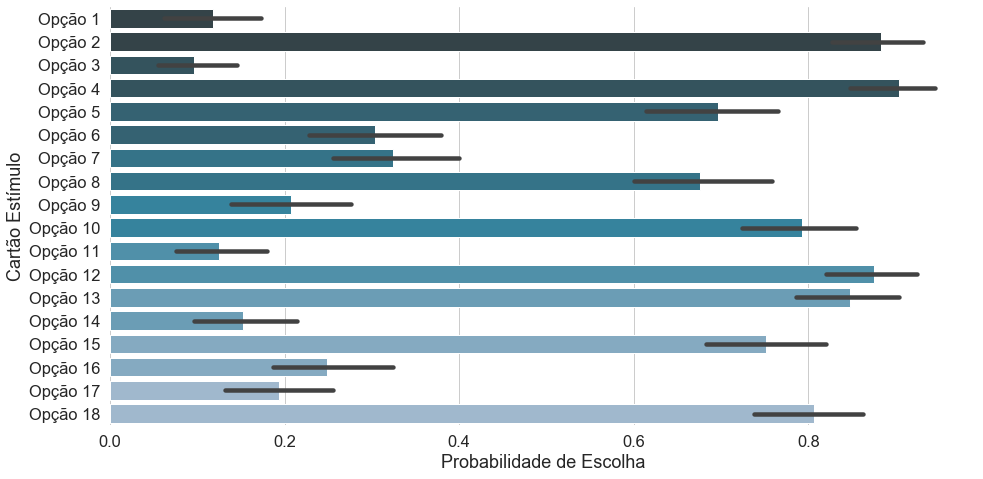

In [14]:
g = sns.catplot(y = "card_available", x = "answer_var", hue = "choice", data = choices,
                height = 7, kind = "bar", palette = "PuBuGn_d", aspect = 2, legend = False, dodge = False)
g.despine(left = True, bottom = True)
g.set_xlabels("Probabilidade de Escolha")
g.set_ylabels("Cartão Estímulo")

### Interessante observar que em nenhum par de cartões teve uma situaçào de ambiguidade de escolhas - existe uma preferência bastante clara para cada escolha em cada situação.

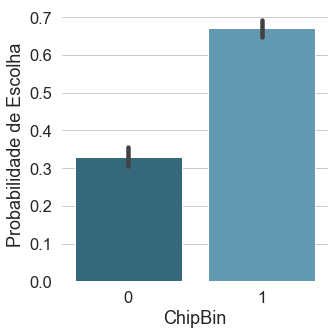

In [15]:
g = sns.catplot(x = "ChipBin", y = "answer_var", data = choices,
                 kind = "bar", palette = "PuBuGn_d", legend = False, dodge = False)
g.despine(left = True, bottom = True)
g.set_ylabels("Probabilidade de Escolha")
g.set_xlabels("ChipBin")

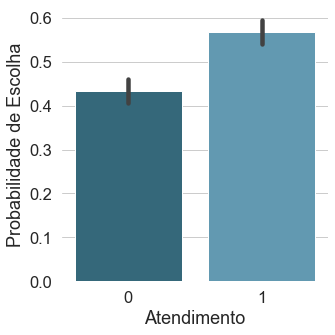

In [16]:
g = sns.catplot(x = "AtendimentoBin", y = "answer_var", data = choices,
                 kind = "bar", palette = "PuBuGn_d", legend = False, dodge = False)
g.despine(left = True, bottom = True)
g.set_ylabels("Probabilidade de Escolha")
g.set_xlabels("Atendimento")

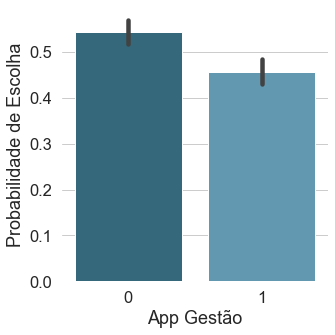

In [17]:
g = sns.catplot(x = "AppGestaoBin", y = "answer_var", data = choices,
                 kind = "bar", palette = "PuBuGn_d", legend = False, dodge = False)
g.despine(left = True, bottom = True)
g.set_ylabels("Probabilidade de Escolha")
g.set_xlabels("App Gestão")

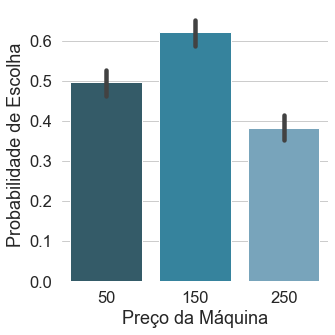

In [18]:
g = sns.catplot(x = "PcMaquina_Q", y = "answer_var", data = choices,
                 kind = "bar", palette = "PuBuGn_d", legend = False, dodge = False)
g.despine(left = True, bottom = True)
g.set_ylabels("Probabilidade de Escolha")
g.set_xlabels("Preço da Máquina")

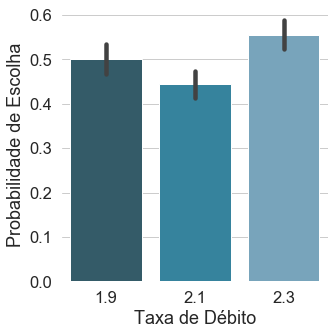

In [19]:
g = sns.catplot(x = "TxDebito_Q", y = "answer_var", data = choices,
                 kind = "bar", palette = "PuBuGn_d", legend = False, dodge = False)
g.despine(left = True, bottom = True)
g.set_ylabels("Probabilidade de Escolha")
g.set_xlabels("Taxa de Débito")

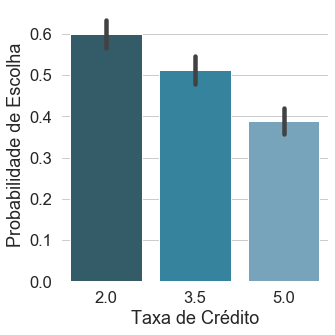

In [20]:
g = sns.catplot(x = "TxCreditoVista_Q", y = "answer_var", data = choices,
                 kind = "bar", palette = "PuBuGn_d", legend = False, dodge = False)
g.despine(left = True, bottom = True)
g.set_ylabels("Probabilidade de Escolha")
g.set_xlabels("Taxa de Crédito")

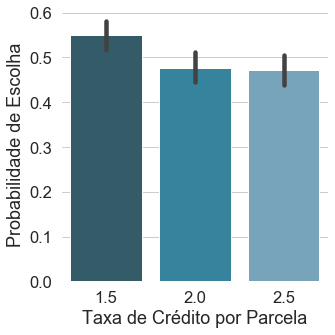

In [21]:
g = sns.catplot(x = "TxCredParcelas_Q", y = "answer_var", data = choices,
                 kind = "bar", palette = "PuBuGn_d", legend = False, dodge = False)
g.despine(left = True, bottom = True)
g.set_ylabels("Probabilidade de Escolha")
g.set_xlabels("Taxa de Crédito por Parcela")

In [22]:
choices.columns

Index(['survey', 'choice', 'card_chosen', 'card_available', 'index',
       'answer_var', 'PcMaquina', 'TxDebito', 'TxCreditoVista',
       'TxCredParcelas', 'Chip', 'AppGestao', 'Atendimento24h', 'ChipBin',
       'AppGestaoBin', 'AtendimentoBin', 'PcMaquina_Q', 'TxDebito_Q',
       'TxCreditoVista_Q', 'TxCredParcelas_Q'],
      dtype='object')

## Realizando a regressão logística via logit multinominal utilizando o pacote `statsmodels`

### Para um primeiro momento, utilizou-se variáveis *dummy* para os atributos quantitativos

In [23]:
quantitative_dummies = pd.get_dummies(choices, columns = ['PcMaquina_Q', 'TxDebito_Q', 'TxCreditoVista_Q', 'TxCredParcelas_Q'])

def remove_dot(x):
    if "." in x:
        return x.replace('.', '')
    return x

quantitative_dummies = quantitative_dummies.rename(columns = remove_dot)

quantitative_dummies.columns

Index(['survey', 'choice', 'card_chosen', 'card_available', 'index',
       'answer_var', 'PcMaquina', 'TxDebito', 'TxCreditoVista',
       'TxCredParcelas', 'Chip', 'AppGestao', 'Atendimento24h', 'ChipBin',
       'AppGestaoBin', 'AtendimentoBin', 'PcMaquina_Q_50', 'PcMaquina_Q_150',
       'PcMaquina_Q_250', 'TxDebito_Q_19', 'TxDebito_Q_21', 'TxDebito_Q_23',
       'TxCreditoVista_Q_20', 'TxCreditoVista_Q_35', 'TxCreditoVista_Q_50',
       'TxCredParcelas_Q_15', 'TxCredParcelas_Q_20', 'TxCredParcelas_Q_25'],
      dtype='object')

### Para a regressão, utilizou-se n-1 níveis de cada atributo - para os casos quantitativos, o ponto médio foi retirado

In [24]:
choices_mod = logit("answer_var ~ PcMaquina_Q_50 + PcMaquina_Q_150 + TxDebito_Q_19 + TxDebito_Q_21"
                   "+ TxCreditoVista_Q_20 + TxCreditoVista_Q_35 + TxCredParcelas_Q_15 + TxCredParcelas_Q_20"
                   "+ ChipBin + AppGestaoBin + AtendimentoBin", quantitative_dummies)

choices_fit = choices_mod.fit()

Optimization terminated successfully.
         Current function value: 0.581827
         Iterations 6


In [25]:
print(choices_fit.summary())

Logit Regression Results                           
Dep. Variable:             answer_var   No. Observations:                 2610
Model:                          Logit   Df Residuals:                     2598
Method:                           MLE   Df Model:                           11
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1606
Time:                        11:37:17   Log-Likelihood:                -1518.6
converged:                       True   LL-Null:                       -1809.1
Covariance Type:            nonrobust   LLR p-value:                1.549e-117
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.8408      0.161    -11.457      0.000      -2.156      -1.526
PcMaquina_Q_50          0.6065      0.112      5.422      0.000       0.387       0.826
PcMaquina_Q_150         1.1546      0.112  

Acima, podemos comprovar que o modelo converge. Porém, o atributo de taxa por parcela no crédito de 2.5% possui um p-valor muito alto - o que indica uma validação da hipótese do atributo não ser estatisticamente relevante. Além disso, observa-se que o aumento de taxa de débito aumenta a utilidade na função - o que a princípio não faz sentido. Uma hipótese seria a falta de aleatoriedade entre os cartões para comparar mais diretamente as variações desse atributo.

In [26]:
print(choices_fit.summary2())

Results: Logit
Model:                Logit            Pseudo R-squared: 0.161      
Dependent Variable:   answer_var       AIC:              3061.1375  
Date:                 2020-06-19 11:37 BIC:              3131.5427  
No. Observations:     2610             Log-Likelihood:   -1518.6    
Df Model:             11               LL-Null:          -1809.1    
Df Residuals:         2598             LLR p-value:      1.5491e-117
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       6.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept           -1.8408   0.1607 -11.4570 0.0000 -2.1557 -1.5259
PcMaquina_Q_50       0.6065   0.1119   5.4223 0.0000  0.3873  0.8258
PcMaquina_Q_150      1.1546   0.1122  10.2943 0.0000  0.9348  1.3744
TxDebito_Q_19      

In [27]:
print(choices_fit.params)

Intercept             -1.840761
PcMaquina_Q_50         0.606524
PcMaquina_Q_150        1.154591
TxDebito_Q_19         -0.243717
TxDebito_Q_21         -0.603071
TxCreditoVista_Q_20    1.000405
TxCreditoVista_Q_35    0.535450
TxCredParcelas_Q_15    0.390666
TxCredParcelas_Q_20    0.019926
ChipBin                1.494473
AppGestaoBin          -0.176987
AtendimentoBin         0.363729
dtype: float64


In [28]:
choices_fit.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             answer_var
Method:                          dydx
At:                           overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
PcMaquina_Q_50          0.1200      0.022      5.521      0.000       0.077       0.163
PcMaquina_Q_150         0.2285      0.021     11.086      0.000       0.188       0.269
TxDebito_Q_19          -0.0482      0.021     -2.349      0.019      -0.088      -0.008
TxDebito_Q_21          -0.1194      0.022     -5.495      0.000      -0.162      -0.077
TxCreditoVista_Q_20     0.1980      0.020      9.732      0.000       0.158       0.238
TxCreditoVista_Q_35     0.1060      0.022      4.921      0.000       0.064       0.148
TxCredParcelas_Q_15     0.0773      0.021      3.722      0.000       0.037       0.118
TxCredParcelas_Q_20     0.0039      0.022      0.179      0.858      -0.039       0.047
ChipBin                 0.2958      0.014     20.639      0.000       0.268       0.324
AppGestaoBin           -0.0350      0.018     -1.992      0.046      -0.069      -0.001
AtendimentoBin          0.0720      0.018      4.096      0.000       0.038       0.106
=======================================================================================
"""

In [29]:
choices_fit.pred_table(threshold = 0.5)

array([[ 886.,  419.],
       [ 274., 1031.]])

Segundo a matriz de confusão, o modelo prevê corretamente 1917 das escolhas feitas - o que significa um percentual de **73.45%** de acerto.

### Fazendo um teste usando o mesmo modelo porém com as variáveis quantitativas em seus valores reais.

In [30]:
choices_mod = logit("answer_var ~ PcMaquina_Q + TxDebito_Q + TxCreditoVista_Q"
                   "+ TxCredParcelas_Q + ChipBin + AppGestaoBin + AtendimentoBin", choices)

choices_fit = choices_mod.fit()

Optimization terminated successfully.
         Current function value: 0.603128
         Iterations 5


In [31]:
print(choices_fit.summary())

Logit Regression Results                           
Dep. Variable:             answer_var   No. Observations:                 2610
Model:                          Logit   Df Residuals:                     2602
Method:                           MLE   Df Model:                            7
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.1299
Time:                        11:37:21   Log-Likelihood:                -1574.2
converged:                       True   LL-Null:                       -1809.1
Covariance Type:            nonrobust   LLR p-value:                 2.361e-97
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1533      0.606      0.253      0.800      -1.034       1.340
PcMaquina_Q         -0.0026      0.001     -4.845      0.000      -0.004      -0.002
TxDebito_Q           0.5651      0.260      2.177      

In [32]:
print(choices_fit.summary2())

Results: Logit
Model:              Logit            Pseudo R-squared: 0.130     
Dependent Variable: answer_var       AIC:              3164.3288 
Date:               2020-06-19 11:37 BIC:              3211.2657 
No. Observations:   2610             Log-Likelihood:   -1574.2   
Df Model:           7                LL-Null:          -1809.1   
Df Residuals:       2602             LLR p-value:      2.3611e-97
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.1533   0.6057  0.2531 0.8002 -1.0339  1.3405
PcMaquina_Q       -0.0026   0.0005 -4.8452 0.0000 -0.0037 -0.0016
TxDebito_Q         0.5651   0.2596  2.1771 0.0295  0.0564  1.0738
TxCreditoVista_Q  -0.3286   0.0357 -9.2046 0.0000 -0.3986 -0.

In [33]:
choices_fit.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             answer_var
Method:                          dydx
At:                           overall
====================================================================================
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
PcMaquina_Q         -0.0005      0.000     -4.924      0.000      -0.001      -0.000
TxDebito_Q           0.1171      0.054      2.185      0.029       0.012       0.222
TxCreditoVista_Q    -0.0681      0.007     -9.768      0.000      -0.082      -0.054
TxCredParcelas_Q    -0.0654      0.021     -3.119      0.002      -0.106      -0.024
ChipBin              0.2971      0.014     20.880      0.000       0.269       0.325
AppGestaoBin        -0.0385      0.018     -2.151      0.031      -0.074      -0.003
AtendimentoBin       0.0875      0.018      4.951      0.000       0.053       0.122
====================================================================================
"""

In [34]:
choices_fit.pred_table(threshold = 0.5)

array([[904., 401.],
       [401., 904.]])

In [35]:
case = {
    'PcMaquina_Q': 250,
    'TxDebito_Q': 1.9,
    'TxCreditoVista_Q': 1.0,
    'TxCredParcelas_Q': 1.0,
    'ChipBin': 1,
    'AppGestaoBin': 0,
    'AtendimentoBin': 1
}

case_df = pd.DataFrame(case, index = [0])

choices_fit.predict(case_df)

0    0.85662
dtype: float64